<a href="https://colab.research.google.com/github/santoreb/Image_Classification_ChestXray_Direction_Prediction/blob/main/Train_Small_Model_1_Directions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/Directions01_RGB.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
import torch
from torchvision import datasets, models
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim
from torch.autograd import Variable

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

transform = ToTensor()

train_data = datasets.ImageFolder(root = "/content/Directions01_RGB/train", transform=transform)
test_data = datasets.ImageFolder(root = "/content/Directions01_RGB/test", transform=transform)

print(train_data)
print(test_data)

Dataset ImageFolder
    Number of datapoints: 948
    Root location: /content/Directions01_RGB/train
    StandardTransform
Transform: ToTensor()
Dataset ImageFolder
    Number of datapoints: 40
    Root location: /content/Directions01_RGB/test
    StandardTransform
Transform: ToTensor()


torch.Size([3, 128, 128])
tensor(0)


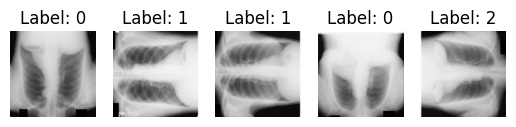

In [ ]:
loaders = {
    'train': torch.utils.data.DataLoader(train_data,
                                         batch_size=10,
                                         shuffle = True,
                                         num_workers=1),
    'test':  torch.utils.data.DataLoader(test_data,
                                         batch_size=10,
                                         shuffle = True,
                                         num_workers=1),
}
loaders

# Get a batch of images and labels
images, labels = next(iter(loaders['train']))

print(images[0].shape)
print(labels[0])

# Visualize the images
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(images[i].permute(1, 2, 0))  # Permute to (H, W, C) format
    axs[i].set_title(f"Label: {labels[i]}")
    axs[i].axis('off')

plt.show()

In [ ]:
model = models.resnet18(pretrained=True)
model

num_features = model.fc.in_features
print('Number of features from pre-trained model', num_features)

model.fc = nn.Linear(num_features, 4)
model = model.to(device)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 158MB/s]


Number of features from pre-trained model 512


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01)

num_epochs = 10

def train(num_epochs, model, loaders):
  model.train()
  total_step = len(loaders['train'])

  for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(loaders['train']):
      b_x = Variable(images)
      b_y = Variable(labels)
      b_x = b_x.to(device)
      b_y = b_y.to(device)
      output = model(b_x)
      loss = loss_func(output, b_y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if (i+1) % 10 == 0:
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i+1, total_step, loss.item()))
        pass
    pass
  pass
train(num_epochs, model, loaders)

Epoch [1/10], Step [10/95], Loss: 1.7766
Epoch [1/10], Step [20/95], Loss: 0.6346
Epoch [1/10], Step [30/95], Loss: 1.1944
Epoch [1/10], Step [40/95], Loss: 0.3160
Epoch [1/10], Step [50/95], Loss: 0.3466
Epoch [1/10], Step [60/95], Loss: 0.5852
Epoch [1/10], Step [70/95], Loss: 0.0608
Epoch [1/10], Step [80/95], Loss: 0.0026
Epoch [1/10], Step [90/95], Loss: 0.0309
Epoch [2/10], Step [10/95], Loss: 0.0978
Epoch [2/10], Step [20/95], Loss: 0.3537
Epoch [2/10], Step [30/95], Loss: 0.2910
Epoch [2/10], Step [40/95], Loss: 0.0772
Epoch [2/10], Step [50/95], Loss: 0.0016
Epoch [2/10], Step [60/95], Loss: 0.0253
Epoch [2/10], Step [70/95], Loss: 0.0020
Epoch [2/10], Step [80/95], Loss: 0.0004
Epoch [2/10], Step [90/95], Loss: 0.0131
Epoch [3/10], Step [10/95], Loss: 0.0534
Epoch [3/10], Step [20/95], Loss: 0.0024
Epoch [3/10], Step [30/95], Loss: 0.1358
Epoch [3/10], Step [40/95], Loss: 0.2851
Epoch [3/10], Step [50/95], Loss: 0.0001
Epoch [3/10], Step [60/95], Loss: 0.0001
Epoch [3/10], St

In [ ]:
def test():
  model.eval()

  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loaders['test']:
      images = images.to(device)
      labels = labels.to(device)
      test_output = model(images)
      pred_y = torch.max(test_output, 1)[1].data.squeeze()
      accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
      print('Test Accuracy of the model on the 1000 test images: %.2f'%accuracy)
test()

Test Accuracy of the model on the 1000 test images: 1.00
Test Accuracy of the model on the 1000 test images: 1.00
Test Accuracy of the model on the 1000 test images: 1.00
Test Accuracy of the model on the 1000 test images: 1.00
